In [ ]:
!git clone https://github.com/Yetiowner/Rouse
!cd Rouse
!python Rouse/setup.py install

Cloning into 'Rouse'...
remote: Enumerating objects: 364, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 364 (delta 20), reused 28 (delta 9), pack-reused 325
Receiving objects: 100% (364/364), 19.04 MiB | 21.54 MiB/s, done.
Resolving deltas: 100% (225/225), done.
running install
/usr/local/lib/python3.9/dist-packages/setuptools/command/install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/setuptools/command/easy_install.py:144: EasyInstallDeprecationWarning: easy_install command is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
running bdist_egg
running egg_info
creating Rouse.egg-info
writing Rouse.egg-info/PKG-INFO
writing dependency_links to Rouse.egg-info/dependency_links.txt
writing requirements to Rouse.egg-info/requires.txt
writing top-level names to R

170498071/170498071 [==============================] - 6s 0us/step
found 50000 images!


/usr/local/lib/python3.9/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


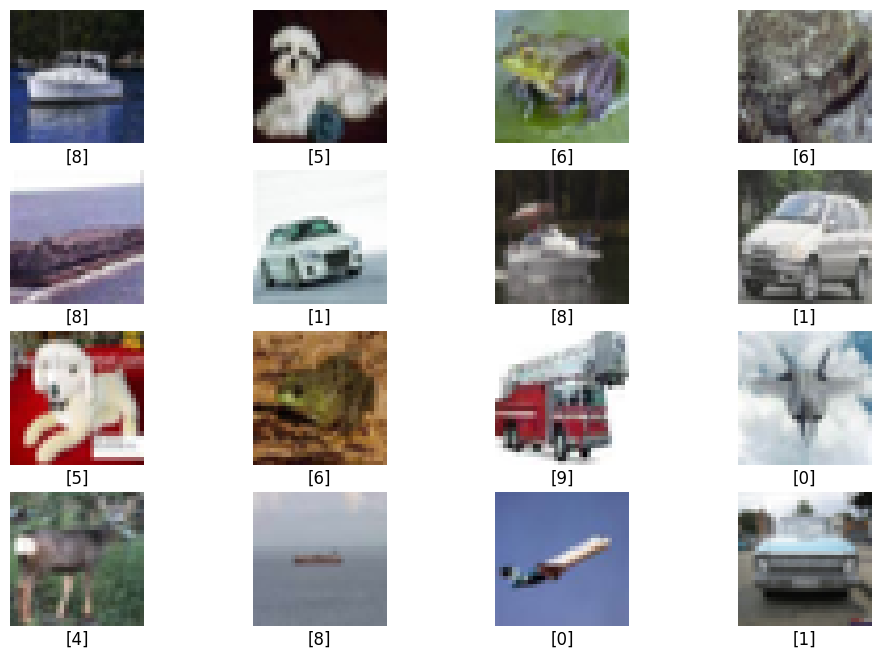

(50000, 1)
Labeling accuracy at start: 60.0
Epoch 1/120
391/391 [==============================] - 119s 240ms/step - loss: 3.1068 - accuracy: 0.2203 - val_loss: 2.8542 - val_accuracy: 0.3986 - lr: 0.0100
Epoch 2/120
391/391 [==============================] - 91s 232ms/step - loss: 3.0106 - accuracy: 0.2840 - val_loss: 2.7492 - val_accuracy: 0.4104 - lr: 0.0100
Epoch 3/120
391/391 [==============================] - 91s 231ms/step - loss: 2.9456 - accuracy: 0.3154 - val_loss: 2.6432 - val_accuracy: 0.4817 - lr: 0.0100
Epoch 4/120
391/391 [==============================] - 91s 232ms/step - loss: 2.8872 - accuracy: 0.3445 - val_loss: 2.6368 - val_accuracy: 0.4410 - lr: 0.0100
Epoch 5/120
391/391 [==============================] - 91s 232ms/step - loss: 2.8368 - accuracy: 0.3650 - val_loss: 2.4911 - val_accuracy: 0.5320 - lr: 0.0100
Epoch 6/120
391/391 [==============================] - 91s 232ms/step - loss: 2.7891 - accuracy: 0.3809 - val_loss: 2.5655 - val_accuracy: 0.4607 - lr: 0.0100
E

KeyboardInterrupt: ignored

In [ ]:
from Rouse import *
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()


print("found", len(x_train), "images!")
showSample(x_test, y_test, 16)
y_train, y_train_old = swapLabels(y_train, 0.4)

print("Labeling accuracy at start:", getLabelingAccuracy(y_train, y_train_old))
#showSample(changes, 16)

accuracyBefore = getValAccuracy(x_train, y_train, x_test, y_test)
print(f"Validation accuracy before dataset modification: {accuracyBefore[0]}% with a loss of {accuracyBefore[1]}")
model, (x_train, y_train, y_train_old), metadata = trainEpochs((x_train, y_train, y_train_old), (x_test, y_test), 1, verbose = 1, mode="delete", augmentationForModification=10)
displayGraph(metadata)
accuracyAfter = getValAccuracy(x_train, y_train, x_test, y_test)
print(f"Validation accuracy after dataset modification: {accuracyAfter[0]}% with a loss of {accuracyAfter[1]}")

#accuracyBefore = getValAccuracy(x_train, y_train, x_test, y_test)
#print(f"Validation accuracy before dataset modification: {accuracyBefore[0]}% with a loss of {accuracyBefore[1]}")
#model1, (x_train, y_train, y_train_old), metadata1 = trainEpochs((x_train, y_train, y_train_old), (x_test, y_test), MAIN_EPOCHS, verbose = 1, mode="delete")
#accuracyAfter = getValAccuracy(x_train, y_train, x_test, y_test)
#print(f"Validation accuracy after dataset modification: {accuracyAfter[0]}% with a loss of {accuracyAfter[1]}")

#displayGraph(metadata1)

In [ ]:
print(metadata)
print(len(images))
correct, incorrect = getCorrectSample(images)
print(len(correct))
print(len(incorrect))
showSample(correct, 16)
showSample(incorrect, 16)

In [ ]:
#metadata = {'val accuracy': [91.36666655540466, 93.7166690826416, 94.23333406448364, 94.81666684150696, 95.45000195503235, 96.31666541099548, 96.78333401679993, 96.14999890327454], 'val loss': [0.9319291114807129, 0.5999569892883301, 0.36166685819625854, 0.21822355687618256, 0.17234396934509277, 0.12887966632843018, 0.11454400420188904, 0.13207554817199707], 'dataset accuracy before': [50.59259259259259, 49.407407407407405, 66.4074074074074, 66.77407407407408, 91.40370370370371, 91.35185185185185, 95.64444444444445, 96.08148148148148], 'dataset accuracy after': [57.733333333333334, 75.44814814814815, 89.22592592592594, 93.52962962962962, 95.25925925925925, 96.46666666666667, 96.57777777777777, 96.87037037037037], 'dataset correct relabelling': [7.151851851851852, 26.185185185185183, 23.18148148148148, 27.48888888888889, 4.588888888888889, 5.774074074074074, 1.5962962962962963, 1.6481481481481481], 'dataset incorrect relabelling': [0.011111111111111112, 0.14444444444444443, 0.362962962962963, 0.7333333333333333, 0.7333333333333333, 0.6592592592592592, 0.662962962962963, 0.8592592592592593], 'total dataset accuracy': [53.57037037037037, 66.59074074074074, 78.0, 91.37777777777778, 93.30555555555556, 95.86296296296297, 96.32962962962964, 96.72407407407407]} # Remove me

In [ ]:
displayGraph(metadata)

In [ ]:
print(labels)

In [ ]:
images = getImages()
images = random.sample(images, 10000)
print("found", len(images), "images!")
images, val_images = splitTrainVal(images, 0.1)
#showSample(images, 16)
#showSample(val_images, 16)
images, changes = swapLabels(images, 0.5)
print("Labeling accuracy at start:", getLabelingAccuracy(images))
#showSample(changes, 16)

model, images1, metadata = trainEpochs(copy.deepcopy(images), MAIN_EPOCHS, verbose = 1)

displayGraph(metadata)

model1, images1, metadata1 = trainEpochs(copy.deepcopy(images), MAIN_EPOCHS, verbose = 1, mode="delete")

displayGraph(metadata1)
print(metadatalist)

In [ ]:
for metadata in metadatalist:
  displayGraph(metadata)